# Loading the data

In [1]:
from pathlib import Path

DATA_PATH = Path('data/gtzan')

from tensorflow.keras.preprocessing import image_dataset_from_directory

def get_dataset(subset):
    return image_dataset_from_directory(
        directory=DATA_PATH/'images_original',
        labels="inferred",
        label_mode="categorical",
        color_mode="rgb",
        batch_size=32,
        image_size=(288, 432),
        shuffle=True,
        seed=7,
        validation_split=0.2,
        subset=subset,
    )

train_ds = get_dataset(subset="training")
val_ds = get_dataset(subset="validation")


Found 999 files belonging to 10 classes.
Using 800 files for training.
Found 999 files belonging to 10 classes.
Using 199 files for validation.


In [2]:
train_ds._flat_shapes

[TensorShape([None, 288, 432, 3]), TensorShape([None, 10])]

In [46]:
from tensorflow.keras.layers import MaxPooling2D, Dropout, Conv2D, Flatten, Dense
from tensorflow.keras import Sequential


# model = Sequential(
#     [
#         Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(288, 432, 3)),
#         Conv2D(32, (3, 3), activation="relu"),
#         MaxPooling2D(pool_size=(2, 2)),
#         Dropout(0.25),
#         Conv2D(64, (3, 3), padding="same", activation="relu"),
#         Conv2D(64, (3, 3), activation="relu"),
#         MaxPooling2D(pool_size=(2, 2)),
#         Dropout(0.25),
#         Conv2D(64, (3, 3), padding="same", activation="relu"),
#         Conv2D(64, (3, 3), activation="relu"),
#         MaxPooling2D(pool_size=(2, 2)),
#         Dropout(0.25),
#         Flatten(),
#         Dense(512, activation="relu"),
#         Dropout(0.5),
#         Dense(10, activation="softmax"),
#     ]
# )

model = Sequential([
    #Note the input shape is the size of the image 300x300 with 3 bytes color
    
    Conv2D(16, (3,3), activation='relu', input_shape=(288, 432, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
       
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    Flatten(),
    
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax"),
])

In [47]:
epochs = 100
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 286, 430, 16)      448       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 143, 215, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 141, 213, 32)      4640      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 70, 106, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 68, 104, 64)       18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 34, 52, 64)      

In [44]:
# tf.config.experimental.set_memory_growth(physical_devices[0], True)
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices[0])

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [48]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

history = model.fit(
    x=train_ds,
    validation_data=val_ds,
    epochs=epochs, 
    verbose=2,
    callbacks=[callback]
)

Epoch 1/100
25/25 - 9s - loss: 13.0546 - accuracy: 0.1887 - val_loss: 3.0945 - val_accuracy: 0.1055 - 9s/epoch - 341ms/step
Epoch 2/100
25/25 - 5s - loss: 2.3725 - accuracy: 0.1800 - val_loss: 2.0989 - val_accuracy: 0.2211 - 5s/epoch - 191ms/step
Epoch 3/100
25/25 - 5s - loss: 2.1581 - accuracy: 0.1900 - val_loss: 2.1343 - val_accuracy: 0.2412 - 5s/epoch - 189ms/step
Epoch 4/100
25/25 - 5s - loss: 2.1106 - accuracy: 0.2412 - val_loss: 2.1002 - val_accuracy: 0.2312 - 5s/epoch - 189ms/step
Epoch 5/100
25/25 - 5s - loss: 1.9318 - accuracy: 0.2675 - val_loss: 2.4766 - val_accuracy: 0.1457 - 5s/epoch - 189ms/step
Epoch 6/100
25/25 - 5s - loss: 2.1814 - accuracy: 0.3013 - val_loss: 2.0744 - val_accuracy: 0.2412 - 5s/epoch - 189ms/step
Epoch 7/100
25/25 - 5s - loss: 1.7351 - accuracy: 0.3837 - val_loss: 1.9477 - val_accuracy: 0.3518 - 5s/epoch - 188ms/step
Epoch 8/100
25/25 - 5s - loss: 1.5796 - accuracy: 0.4437 - val_loss: 3.2108 - val_accuracy: 0.1357 - 5s/epoch - 190ms/step
Epoch 9/100
25/

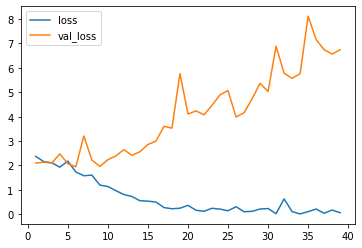

In [49]:
results_cnn = pd.DataFrame(history.history).iloc[1:, :]
results_cnn.loss.plot(label='loss')
results_cnn.val_loss.plot(label='val_loss')
plt.legend()
plt.show()

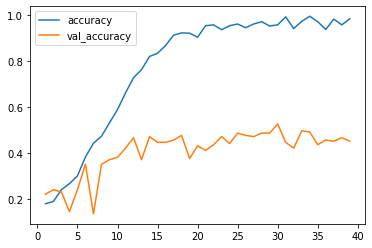

In [50]:
results_cnn.accuracy.plot(label='accuracy')
results_cnn.val_accuracy.plot(label='val_accuracy')
plt.legend()
plt.show()

# Beep 

In [52]:
import winsound
frequency = 500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)